# Homework 4

**Code from the starter Notebook**

#  Setup

In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

The data used, can be downloaded here:
* https://github.com/gastonstat/CreditScoring
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

# Preparation

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [151]:
data = "../data/CreditScoring.csv"

df = pd.read_csv(data)
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Some of the features are encoded as numbers. Use the following code to de-code them:

In [152]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [153]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Prepare the numerical variables:

In [154]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [155]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [156]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

**Start Homework**

What are the categorical variables? What are the numerical?

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 487.3+ KB




Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use ```train_test_split``` funciton for that with random_state=1

 



In [158]:
# categorical variables: dtype: object
categorical = ["home", "marital", "records", "job"]

# numericcsl variables
numerical = ["seniority", "time", "age", "expenses", "income", "assets", "debt", "amount", "price"]

In [159]:
# split the data
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, shuffle=True)

In [160]:
len(df_full_train), len(df_test)

(3563, 891)

In [161]:
len(df_train), len(df_val)

(2672, 891)

In [162]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["default"].values
y_val = df_val["default"].values
y_test = df_test["default"].values
 
del df_train["default"]
del df_val["default"]
del df_test["default"]

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.


In [163]:
from sklearn.metrics import roc_auc_score

for col in numerical:
    print(col)
    roc_auc = roc_auc_score(y_train, df_train[col])
    if roc_auc < 0.5:
        roc_auc = roc_auc_score(y_train, -df_train[col])
    print(f"score: {roc_auc}")

seniority
score: 0.7093778624491943
time
score: 0.5608662489595051
age
score: 0.5732933272499939
expenses
score: 0.5009184217217011
income
score: 0.682006666132633
assets
score: 0.6486042567122802
debt
score: 0.5047829675783548
amount
score: 0.5910773431595518
price
score: 0.5043329862114843




Which numerical variable (among the following 4) has the highest AUC?

* seniority
* time
* income
* debt

**Answer:** The highest AUC score has seniority

**Training the model**

From now on, use these columns only:

```['seniority', 'income', 'assets', 'records', 'job', 'home']```

Apply one-hot-encoding using ```DictVectorizer``` and train the logistic regression with these parameters:

```LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)```

In [164]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

cols = ['seniority', 'income', 'assets', 'records', 'job', 'home']

train_dicts = df_train[cols].to_dict(orient="records")
val_dicts = df_val[cols].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [165]:
y_pred = model.predict_proba(X_val)[:,1]

In [166]:
roc_auc_score(y_val, y_pred)

0.8120879813449298


## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.512
* 0.612
* 0.712
* 0.812

**Answer:** The closest value is 0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

recall = tp / (tp + fn)

precision = tp / (tp + fp)

In [167]:
thresholds = np.linspace(0.0, 1.0, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [168]:
recall = []
precision = []

for t in thresholds:
    actual_positives = (y_val == 1)
    actual_negatives = (y_val == 0)
    predicted_positives = (y_pred >= t)
    predicted_negatives = (y_pred < t)

    tp = (actual_positives & predicted_positives).sum()
    fn = (predicted_negatives & actual_positives).sum()
    fp = (predicted_positives & actual_negatives).sum()
   
    r = tp / (tp + fn)
    p = tp / (tp + fp)
    
    recall.append(r)
    precision.append(p)
    #print(f"threshold: {t:.3f}, recall: {r:.3f}, precision {p:.3f}")

<ipython-input-168-1f9a5d3b57e9>:15: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


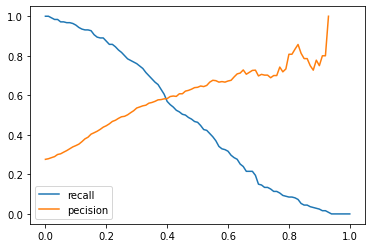

In [169]:
plt.plot(thresholds, recall, label="recall")
plt.plot(thresholds, precision, label="pecision")
plt.legend();

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

**Answer:** The curves intersect at 0.4

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

```F1 = 2 * P * R/(P + R)```
 
Where ```P``` is precision and ```R``` is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [170]:
f1_scores = []
for i, t in enumerate(thresholds):
    
    f1 = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
        
    f1_scores.append(f1)

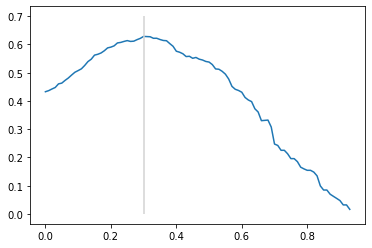

In [171]:
plt.plot(thresholds, f1_scores)
plt.vlines(0.3, 0, 0.7, color="lightgrey");

At which threshold F1 is maximal?

* 0.1
* 0.3
* 0.5
* 0.7

**Answer:** F1 is maximal at 0.3.

## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

```KFold(n_splits=5, shuffle=True, random_state=1)```

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: ```LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)```
* Use AUC to evaluate the model on validation

In [172]:
from sklearn.model_selection import KFold

In [184]:
def kfold_train(C=1):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):

        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.default.values
        y_val = df_val.default.values
    
        train_dicts = df_train[cols].to_dict(orient="records")
        val_dicts = df_val[cols].to_dict(orient="records")

        dv = DictVectorizer(sparse=False)
        dv.fit(train_dicts)
        X_train = dv.transform(train_dicts)
        X_val = dv.transform(val_dicts)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:,1]

        scores.append(roc_auc_score(y_val, y_pred))
    
    return scores
scores = kfold_train()

print(f"mean score: {np.mean(scores):.4f}, standard deviation: {np.std(scores):.4f}")

mean score: 0.8142, standard deviation: 0.0146


How large is standard devidation of the scores across different folds?

* 0.001
* 0.014
* 0.09
* 0.14

**Answer:** 0.014 is the standard deviation over the different folds.

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: ```[0.01, 0.1, 1, 10]```
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: ```LogisticRegression(solver='liblinear', C=C, max_iter=1000)```
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [185]:
C = [0.01, 0.1, 1, 10]
for c in C:
    scores = kfold_train(C=c)
    print(f"C: {c}, mean score: {np.mean(scores)}")

C: 0.01, mean score: 0.8085529274116198
C: 0.1, mean score: 0.812901723271431
C: 1, mean score: 0.8141695497076604
C: 10, mean score: 0.8119422923179085


Which C leads to the best mean score?

* 0.01
* 0.1
* 1
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

**Answer:** The best mean score is achieved using C=1.